<a href="https://colab.research.google.com/github/raffeekk/Course-work-on-ML/blob/main/notebooks/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Курсовая работа по дисциплине "Машинное обучение"**

### Автор: Горбуненко Дмитрий Денисович.
### Группа: КРНД23-ПМиИ-АД-о.

# **Прогнозирование и анализ факторов депрессии среди студентов с применением методов машинного обучения**


### **Содержание:**
1. Введение
2. Анализ данных
   - 2.1 Загрузка и предварительный обзор данных
   - 2.2 Статистический анализ
   - 2.3 Визуализация данных
   - 2.4 Предобработка данных
3. Обучение моделей машинного обучения
   - 3.1 Подготовка данных для обучения
   - 3.2 Выбор признаков
   - 3.3 Разделение выборки
4. Построение и сравнение моделей
   - 4.1 Линейная регрессия
   - 4.2 Градиентный спуск
   - 4.3 Анализ результатов и сравнение моделей
5. Выводы и заключение

---

## **1. Введение**

Депрессия среди студентов представляет собой серьезную проблему, которая может влиять не только на академическую успеваемость, но и на общее психологическое благополучие. Раннее выявление признаков депрессии и понимание факторов риска имеет огромное значение для разработки эффективных стратегий профилактики и вмешательства.

Целью данной курсовой работы является разработка и сравнение моделей машинного обучения для прогнозирования уровня депрессии на основе различных факторов жизни студентов. Исследование направлено на выявление ключевых предикторов депрессии и создание инструмента, который может помочь в раннем обнаружении студентов с риском развития депрессивных состояний.

В работе будет использован набор данных "Student Depression Dataset", содержащий информацию о различных аспектах жизни студентов и соответствующих уровнях депрессии. С помощью методов машинного обучения, таких как линейная регрессия и градиентный спуск, мы построим модели, способные предсказывать уровень депрессии на основе имеющихся характеристик.

В данной работе будут применены следующие методы:
- Детальный исследовательский анализ данных
- Предобработка и инженерия признаков
- Построение и обучение моделей машинного обучения
- Оценка и сравнение производительности моделей
- Интерпретация результатов с точки зрения практического применения

Результаты исследования могут быть использованы образовательными учреждениями для разработки программ поддержки психического здоровья студентов и создания систем раннего выявления рисков депрессии.

---

## **2. Анализ данных**

### **2.1 Загрузка и предварительный обзор данных**

Начнем с импорта необходимых библиотек и загрузки набора данных.

In [29]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings

# Отключаем предупреждения для более чистого вывода
warnings.filterwarnings('ignore')

In [30]:
# Настройка стиля визуализации
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-pastel')

# Загрузка набора данных
url = "https://raw.githubusercontent.com/raffeekk/Course-work-on-ML/refs/heads/main/data/Student%20Depression%20Dataset.csv"
df = pd.read_csv(url)

# Предварительный просмотр данных
print("Размер набора данных:", df.shape)
print("\nПервые 5 строк набора данных:")
df.head()

Размер набора данных: (27901, 18)

Первые 5 строк набора данных:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [31]:
# Информация о структуре данных
print("\nИнформация о структуре данных:")
df.info()

# Статистический анализ числовых данных
print("\nСтатистический анализ числовых данных:")
df.describe()

# Проверка наличия пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())


Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                        

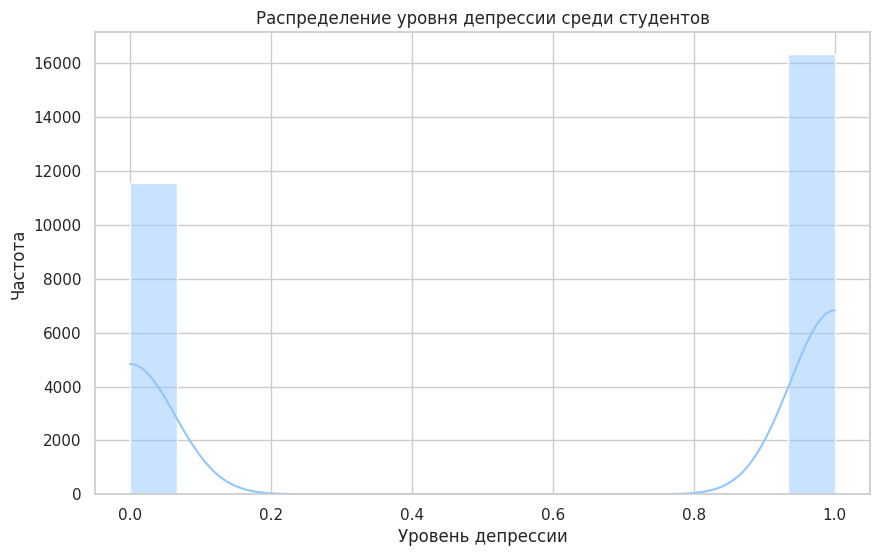

In [32]:
# Анализ целевой переменной (уровень депрессии)
target_column = 'Depression'
plt.figure(figsize=(10, 6))
# sns.histplot(df['depression_score'], kde=True, bins=15)
sns.histplot(df[target_column], kde=True, bins=15)
plt.title('Распределение уровня депрессии среди студентов')
plt.xlabel('Уровень депрессии')
plt.ylabel('Частота')
plt.show()

In [33]:
# Проверка категориальных переменных
print("\nУникальные значения категориальных переменных:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

# Статистика по категориальным переменным
print("\nЧастота значений категориальных переменных:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Уникальные значения категориальных переменных:
Gender: ['Male' 'Female']
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Sleep Duration: ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD'

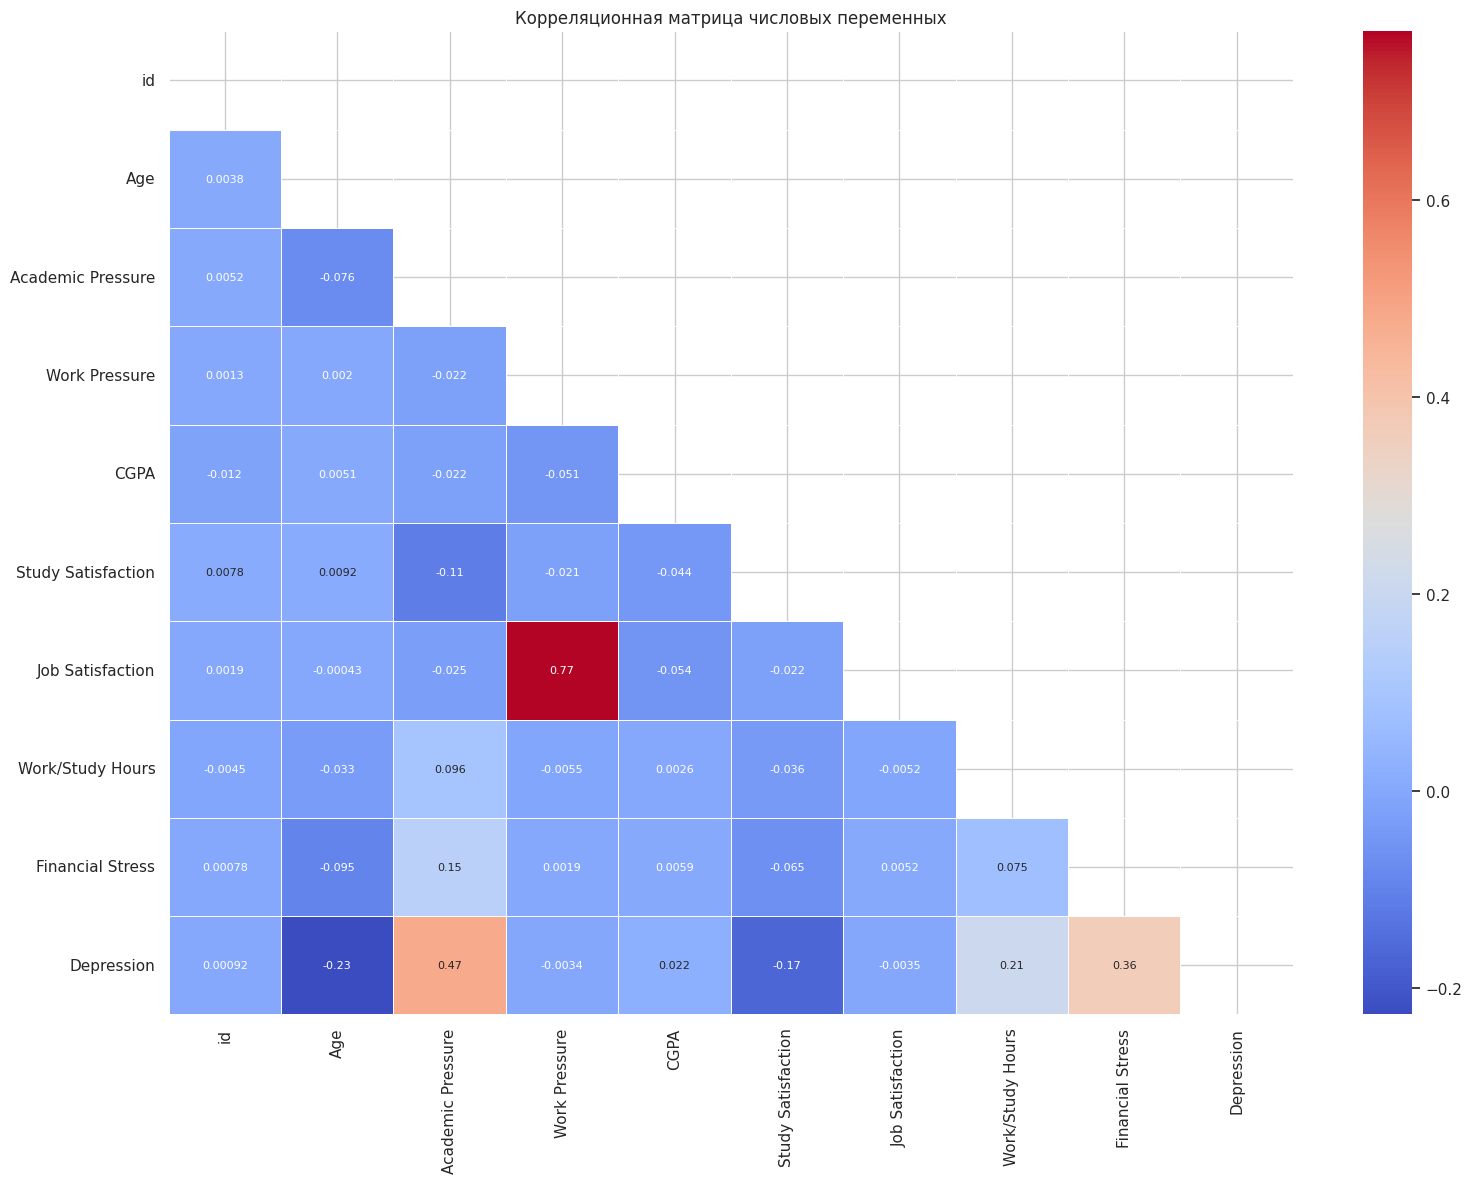

In [34]:
# Анализ корреляций между числовыми переменными
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 8})
plt.title('Корреляционная матрица числовых переменных')
plt.tight_layout()
plt.show()

In [35]:
# Поиск наиболее коррелированных с депрессией переменных
# depression_correlations = correlation_matrix['depression_score'].sort_values(ascending=False)

depression_correlations = correlation_matrix[target_column].sort_values(ascending=False)
print("\nКорреляция переменных с уровнем депрессии:")
print(depression_correlations)


Корреляция переменных с уровнем депрессии:
Depression            1.000000
Academic Pressure     0.474835
Financial Stress      0.363591
Work/Study Hours      0.208563
CGPA                  0.022210
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226422
Name: Depression, dtype: float64


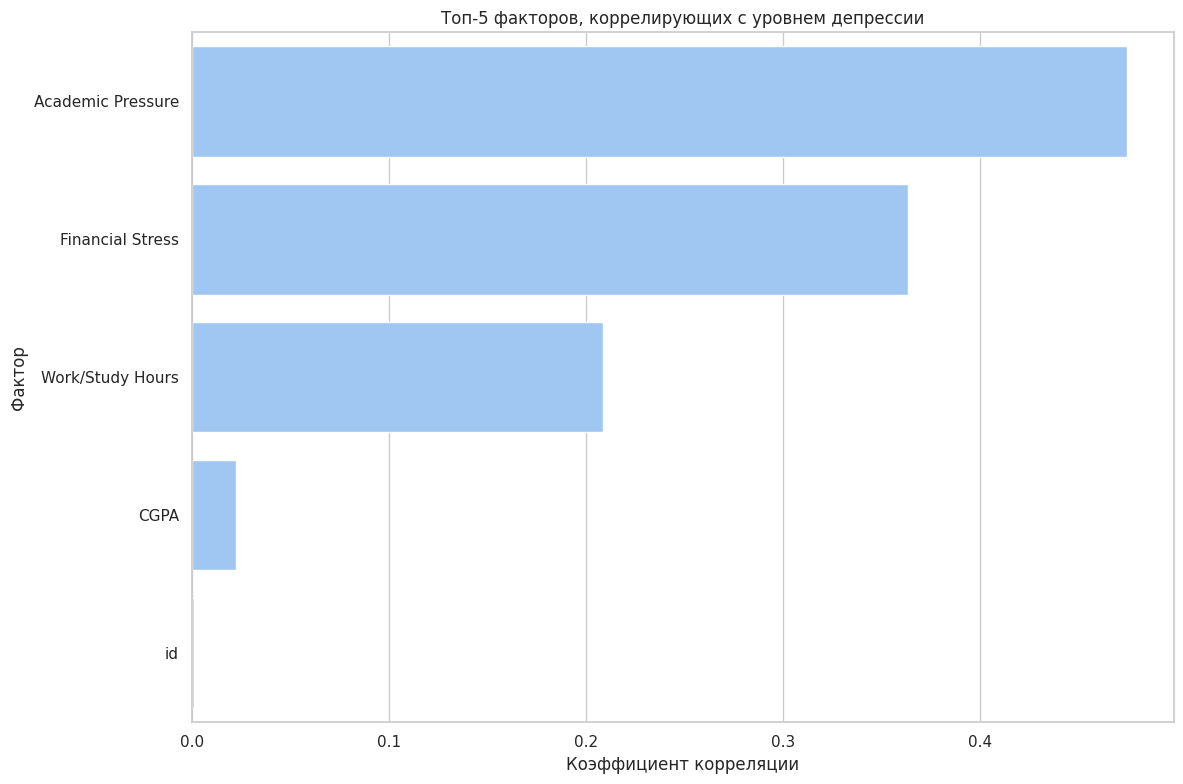

In [36]:
# Визуализация топ-5 факторов, коррелирующих с депрессией
top_correlations = depression_correlations[1:6]  # Исключаем саму depression_score
plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Топ-5 факторов, коррелирующих с уровнем депрессии')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Фактор')
plt.tight_layout()
plt.show()


Структура предобработанных данных:


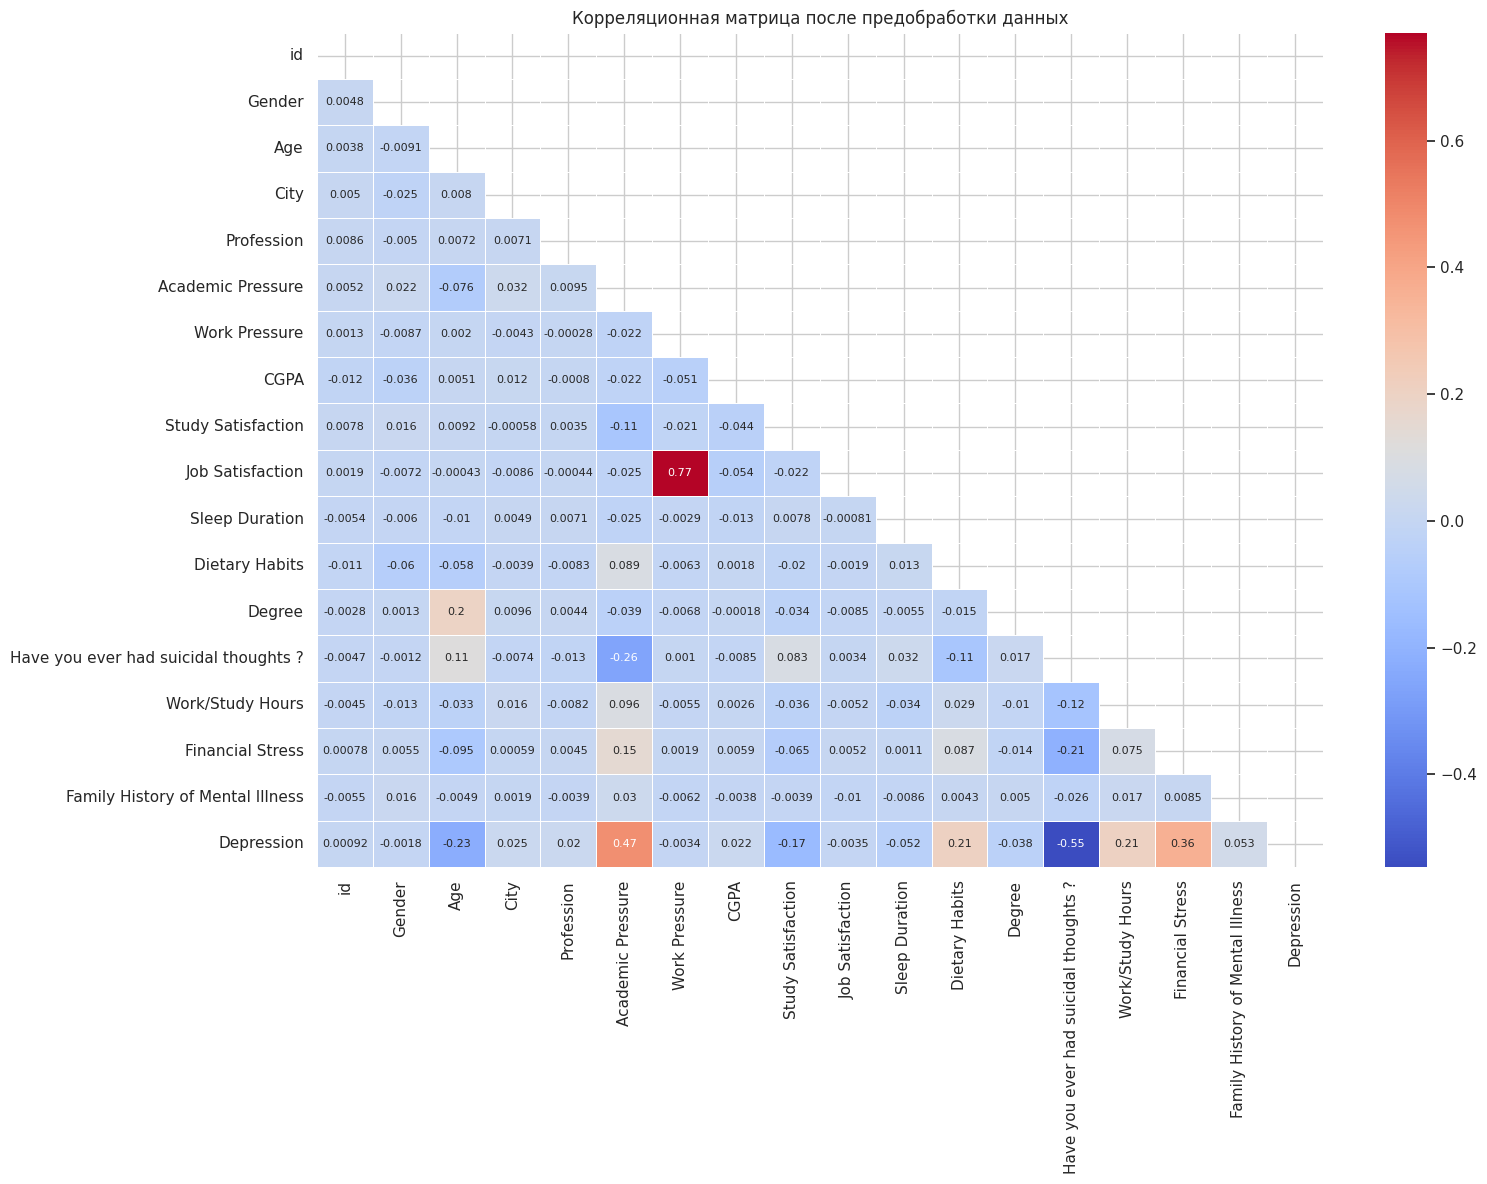

In [37]:
# Дополнительные визуализации для лучшего понимания данных

# Анализ уровня депрессии по полу
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Gender', y='Depression', data=df)
# plt.title('Уровень депрессии в зависимости от пола')
# plt.xlabel('Пол')
# plt.ylabel('Уровень депрессии')
# plt.show()

# # Анализ уровня депрессии по году обучения
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='City', y='Depression', data=df)
# plt.title('Уровень депрессии по годам обучения')
# plt.xlabel('Год обучения')
# plt.ylabel('Уровень депрессии')
# plt.show()

# # Связь между депрессией и успеваемостью
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='CGPA', y='Depression', data=df, alpha=0.7)
# plt.title('Связь между успеваемостью (CGPA) и уровнем депрессии')
# plt.xlabel('CGPA (Cumulative Grade Point Average)')
# plt.ylabel('Уровень депрессии')
# plt.grid(True)
# plt.show()

# # Связь между финансовым статусом и уровнем депрессии
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Financial Stress', y='Depression', data=df)
# plt.title('Уровень депрессии в зависимости от финансового статуса')
# plt.xlabel('Финансовый статус')
# plt.ylabel('Уровень депрессии')
# plt.show()

# Связь между уровнем физической активности и депрессией
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='physical_activity', y='Depression', data=df)
# plt.title('Уровень депрессии в зависимости от физической активности')
# plt.xlabel('Уровень физической активности')
# plt.ylabel('Уровень депрессии')
# plt.show()

# Предобработка данных

# Функция для преобразования категориальных переменных в числовые
def preprocess_categorical_data(df):
    # Создаем копию исходного датафрейма
    processed_df = df.copy()

    # Преобразование категориальных переменных при необходимости
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Словари для маппинга категорий в числа
    mappings = {}

    # Применяем преобразования индивидуально для каждой переменной
    for col in categorical_columns:
        # Создаем индивидуальные преобразования в зависимости от содержания переменной
        if col == 'gender':
            mappings[col] = {'Male': 0, 'Female': 1}
        elif col == 'relationship_status':
            mappings[col] = {'Single': 0, 'In a relationship': 1, 'Married': 2}
        elif col == 'financial_status':
            mappings[col] = {'Poor': 0, 'Middle class': 1, 'Rich': 2}
        elif col == 'living_condition':
            mappings[col] = {'Alone': 0, 'With family': 1, 'With friends': 2}
        elif col == 'physical_activity':
            mappings[col] = {'Low': 0, 'Moderate': 1, 'High': 2}
        elif col == 'mental_health_history':
            mappings[col] = {'No': 0, 'Yes': 1}
        else:
            # Для остальных переменных используем простую нумерацию
            unique_values = df[col].unique()
            mappings[col] = {val: i for i, val in enumerate(unique_values)}

        # Применяем преобразование
        processed_df[col] = processed_df[col].map(mappings[col])

    return processed_df, mappings

# Применяем предобработку
processed_df, category_mappings = preprocess_categorical_data(df)

# Проверяем результаты преобразования
print("\nСтруктура предобработанных данных:")
processed_df.head()

# Проверяем корреляции после предобработки
correlation_matrix_processed = processed_df.corr()

plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix_processed)
sns.heatmap(correlation_matrix_processed, annot=True, mask=mask, cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 8})
plt.title('Корреляционная матрица после предобработки данных')
plt.tight_layout()
plt.show()

# Сохраняем предобработанные данные для дальнейшего использования
processed_df_for_modeling = processed_df.copy()

In [39]:
# Добавьте обработку пропусков перед выбором признаков

from sklearn.impute import SimpleImputer

# Проверка наличия пропусков
print("Пропуски в данных до обработки:")
print(processed_df_for_modeling.isnull().sum())

# Заполнение пропусков
numeric_cols = processed_df_for_modeling.select_dtypes(include=[np.number]).columns
categorical_cols = processed_df_for_modeling.select_dtypes(include=['object']).columns

# Для числовых признаков
imputer_num = SimpleImputer(strategy='median')
processed_df_for_modeling[numeric_cols] = imputer_num.fit_transform(processed_df_for_modeling[numeric_cols])

# Для категориальных признаков (если остались)
imputer_cat = SimpleImputer(strategy='most_frequent')
processed_df_for_modeling[categorical_cols] = imputer_cat.fit_transform(processed_df_for_modeling[categorical_cols])

# Проверка после обработки
print("\nПропуски в данных после обработки:")
print(processed_df_for_modeling.isnull().sum())

# Теперь можно продолжить разделение данных
X = processed_df_for_modeling.drop('Depression', axis=1)
y = processed_df_for_modeling['Depression']

# Исправленная функция выбора признаков
def select_best_features(X, y, k=10):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    selected_indices = selector.get_support(indices=True)
    selected_features = X.columns[selected_indices]

    scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    }).sort_values(by='Score', ascending=False)

    return X_selected, selected_features, scores

# Применение после обработки пропусков
X_selected, selected_features, feature_scores = select_best_features(X, y, k=10)

Пропуски в данных до обработки:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


ValueError: at least one array or dtype is required